# Business Problem

## Problem Description
The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.

## Acknowledgements
The dataset comes from a competition hosted by Analytics Vidhya.

## Data Overview
Dataset of 550 000 observations about the black Friday in a retail store, it contains different kinds of variables either numerical or categorical. It contains missing values.

### Target Variable
In this approach:
* Purchase- the purchase ammount

### Other Features
* User_ID- unique id of the user
* Product_ID- unique id of the product
* Gender- male or female
* Age- age category the customer belongs to
* Occupation- Occupation of the customer
* City_Category-city category the customer resides in
* Stay_In_Current_City_Years- no. of years the customer has resided in the current city
* Marital_Status- married or unmarried
* Product_Category_1- products of category 1 
* Product_Category_2- products of category 2
* Product_Category_3- products of category 3
* Purchase- Purchase amount in dollars

## Exploratory Data Analysis

#### Importing the libraries

In [30]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap

# Seaborn for easier visualization
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function to perform data standardization 
from sklearn.preprocessing import StandardScaler

# Libraries to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import classes for ML Models
from sklearn.linear_model import Ridge  ## Linear Regression + L2 regularization
from sklearn.svm import SVR ## Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor ## Random Forest Regressor
from sklearn.neighbors import KNeighborsRegressor ## KNN regressor
from sklearn.tree import DecisionTreeRegressor ## Decision Tree Regressor
from sklearn import linear_model ## Lasso Regressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

# To save the final model on disk
from sklearn.externals import joblib

#### Loading data from csv

In [2]:
df = pd.read_csv('Files/BlackFriday.csv')

Display the dimension of the dataset

In [3]:
df.shape

(537577, 12)

Display the first 5 rows

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Some features are numerical and some are categorical

In [5]:
df.dtypes[df.dtypes=='object']

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
dtype: object

## Distribution of numerical features

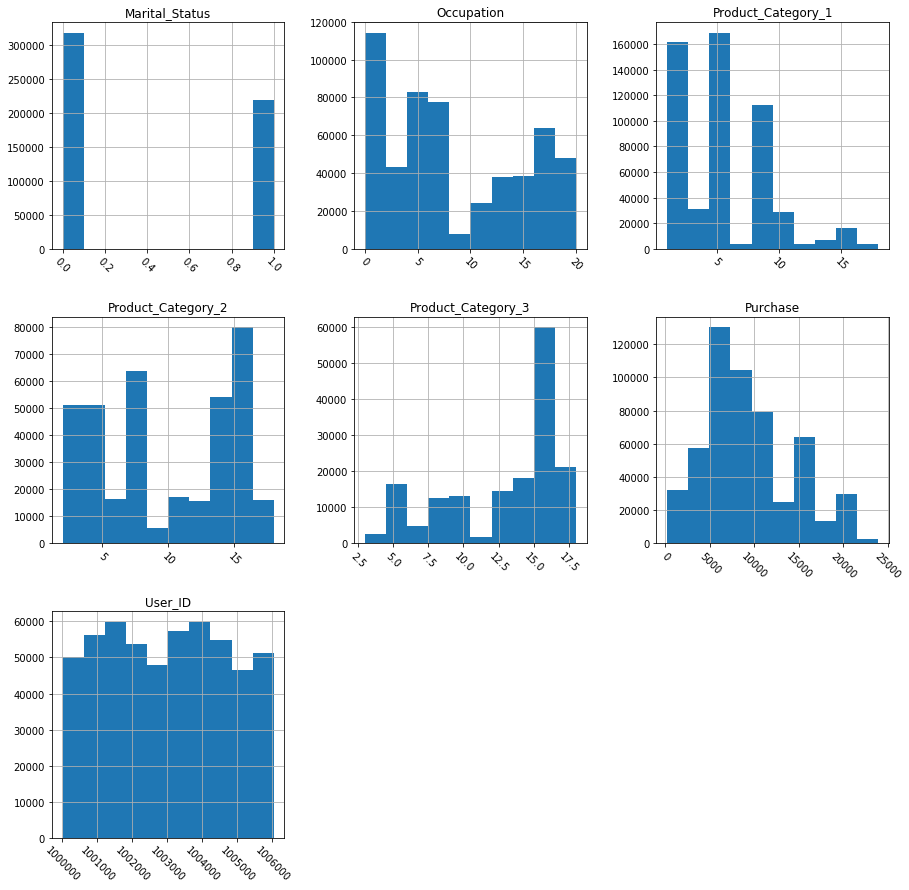

In [6]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

#### Observations
From the hostagram of Product_category_1
* There are most unmarriedd customers in the dataset.
* The product 5 are most bought by the customers.
* And so are product 1 and 8.

This information can be used to know about the products which have a high demand.

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


#### Observations
* Columns Product_Category_2 and Product_Category_3 have missing values.
* Marital status has min and max values 0 and 1.Therefore, this might be a binary feature.

## Distribution of Categorical features

In [8]:
df.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


#### Observations
* There are no missing values in categorical features.
* There are 3623 unique products.
* Most purchases have occured from the age group of 26 to 35 among the 7 unique age groups.

This information can be used to give better suggestions on products if the age of the customers are provided.
* Most purchases have occured from the city category 'B'.

This information can be used to give better suggestions on products if the city category is provided.

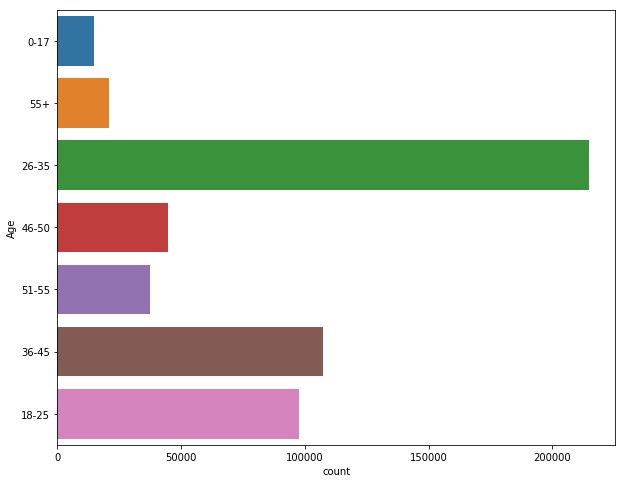

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(y='Age', data=df)

#### Observations
* The classes 26-35, 36-45, 18-25 are quite prevalent in the dataset.

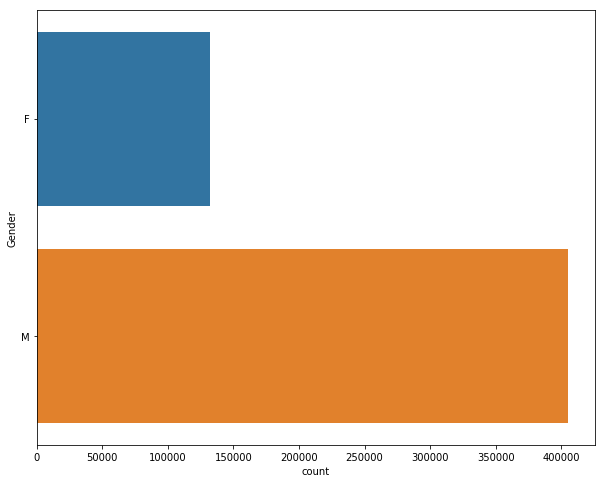

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(y='Gender', data=df)

#### Observations 
* Most customers are males

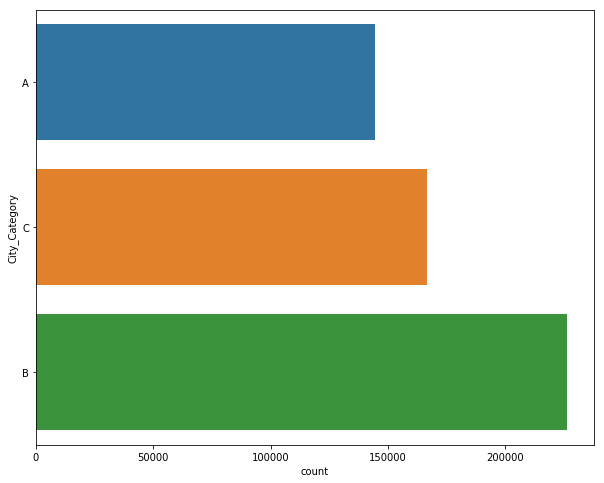

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(y='City_Category', data=df)

#### Observations
* Most customers are from city B

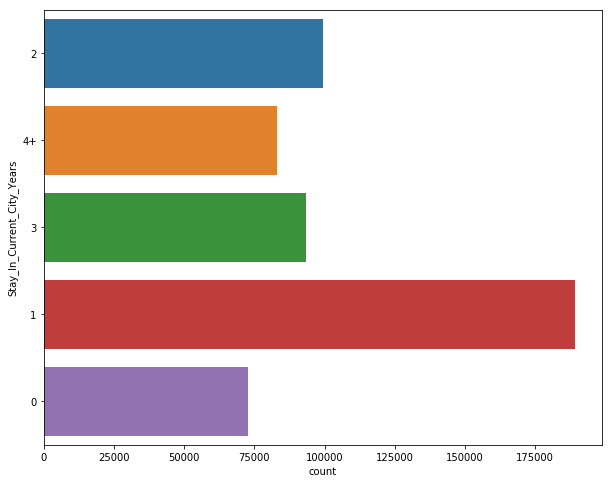

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(y='Stay_In_Current_City_Years', data=df)

## Correlations

* Finally, let's take a look at the relationships between numeric features and other numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [15]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


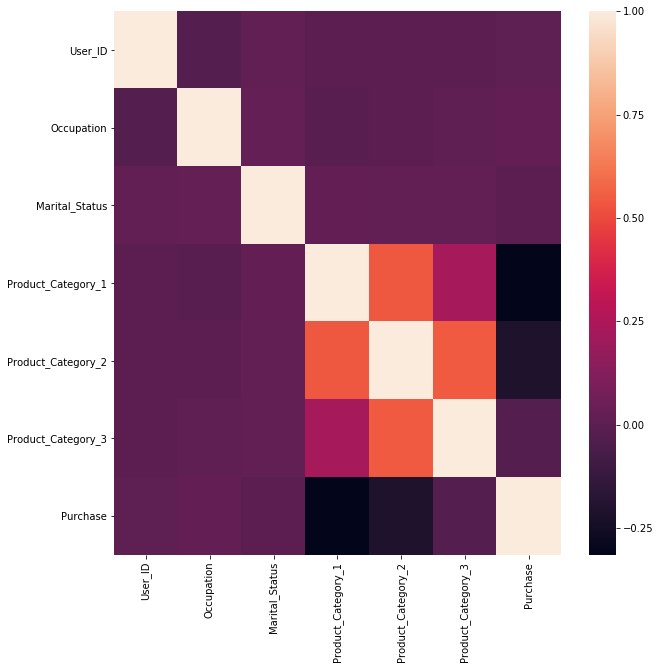

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

**What to look for?**
* The colorbar on the right explains the meaning of the heatmap - Dark colors indicate **strong negative correlations** and light colors indicate **strong positive correlations**.
* Perhaps the most helpful way to interpret this correlation heatmap is to first find features that are correlated with our target variable by scanning the last column.
* In this case, it doesn't look like many features are strongly correlated with the target variable.
* Seems like there is negative correlation between the columns 'Purchase' and 'Product_Category_1'.

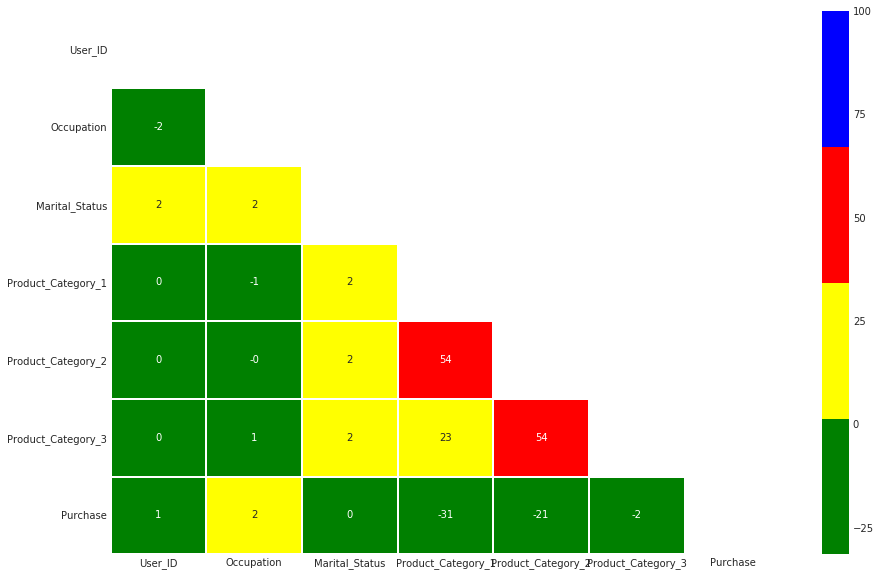

In [17]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

## Data Cleaning

### Dropping the duplicates (De-duplication)

In [18]:
df = df.drop_duplicates()
print( df.shape )

(537577, 12)


Looks like our data had no duplicates.

## Handling the missing values

* There were missing values in the columns 'Product_Category_1' and 'Product_Category_2'.

In [20]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
df.Product_Category_2.fillna(0, inplace=True)

In [22]:
df.Product_Category_2.unique()

array([ 0.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [23]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [24]:
df.Product_Category_3.fillna(0, inplace=True)

In [27]:
# Display number of missing values by numeric feature
df.select_dtypes(exclude=['object']).isnull().sum()

User_ID               0
Occupation            0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
Purchase              0
dtype: int64

We don't have any numerical features with missing values

In [28]:
# Save cleaned dataframe to new file
df.to_csv('Files/cleaned_df.csv', index=None)

In [2]:
df = pd.read_csv('Files/cleaned_df.csv')

## Feature Engineering

* Feature engineering is finding out new features from the existing ones.
* This helps us isolating key information.

#### Filtering the data

In [4]:
# female: 0 and male: 1
def gender(x):
    if x=='M':
        return 1
    return 0

df['Gender']=df['Gender'].map(gender)

In [6]:
# Defining different age groups
def agegroup(x):
    if x=='0-17':
        return 1
    elif x=='18-25':
        return 2
    elif x ==  "26-35" :
        return 3
    elif x ==  "36-45" :
        return 4
    elif x ==  "46-50" :
        return 5
    elif x ==  "51-55" :
        return 6
    elif x ==  "55+" :
        return 7
    else:
        return 0
    
df['AgeGroup']=df['Age'].map(agegroup)

In [12]:
df.drop(['Age'],axis=1,inplace=True)

#### Indicator Variables

* We know that bachelors are found mostly in the range 25 to 35.
* Therefore we can make a feature combining the 'AgeGroup','Gender' and 'Marital_Status'

In [19]:
df['Bachelor']=((df.AgeGroup == 2) & (df.Marital_Status == 0) & (df.Gender == 1)).astype(int)

In [20]:
# Display percent of rows where Bachelor == 1
df[df['Bachelor']==1].shape[0]/df.shape[0]

0.10985030981608217

Almost 11% of the data contains bachelors.This information will be helpful to suggest products for bachelors

#### Encoding Dummy Variables

* Before feeding the data to the machine learning algorithm, we need to convert categorical features into numerical features.
* Therefore we need to create dummy variables for our categorical features.

In [22]:
from sklearn.preprocessing import LabelEncoder

In [24]:
P = LabelEncoder()
df['Product_ID'] = P.fit_transform(df['Product_ID'])
U = LabelEncoder()
df['User_ID'] = P.fit_transform(df['User_ID'])

In [26]:
# Create a new dataframe with dummy variables for for our categorical features.
df = pd.get_dummies(df, columns=['City_Category', 'Stay_In_Current_City_Years'])

In [32]:
df.head()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,AgeGroup,Bachelor,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,670,0,10,0,3,0.0,0.0,8370,1,0,1,0,0,0,0,1,0,0
1,0,2374,0,10,0,1,6.0,14.0,15200,1,0,1,0,0,0,0,1,0,0
2,0,850,0,10,0,12,0.0,0.0,1422,1,0,1,0,0,0,0,1,0,0
3,0,826,0,10,0,12,14.0,0.0,1057,1,0,1,0,0,0,0,1,0,0
4,1,2732,1,16,0,8,0.0,0.0,7969,7,0,0,0,1,0,0,0,0,1


In [33]:
df.shape

(537577, 19)

In [34]:
# Save analytical base table
df.to_csv('Files/final_df.csv', index=None)

## Machine Learning Models

#### Data Preparation

In [3]:
df = pd.read_csv("Files/final_df.csv")

In [4]:
df.shape

(537577, 19)

#### Test Train Split

Since this is an enormous dataset, my machine won't be capable enough to run machine learning models.Therefore lets take a sample of 50000 data points for evaluation.

In [5]:
sample_df = df.sample(n=50000,random_state=100)

In [6]:
# Create separate object for target variable
y = sample_df.Purchase
# Create separate object for input features
X = sample_df.drop('Purchase', axis=1)

In [7]:
# Split X and y into train and test sets: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40000, 18) (10000, 18) (40000,) (10000,)


#### Data Standardization
* In data standardization we perform zero mean centering. i.e. we make the mean of all the features 0 and the standard deviation as 1.

In [9]:
train_mean = X_train.mean()
train_std = X_train.std()

In [10]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [11]:
## Check for mean and std dev.
X_train.describe()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,AgeGroup,Bachelor,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04
mean,-1.253234e-16,9.057685e-18,-1.578737e-15,1.217720e-16,-2.154688e-15,2.553890e-15,9.393097e-16,3.112594e-16,-2.102984e-16,3.280626e-16,-6.734890e-16,5.285727e-15,-1.504025e-15,-1.992503e-15,1.981526e-16,9.853368e-16,8.897327e-17,5.581813e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.745590e+00,-1.693693e+00,-1.763061e+00,-1.249694e+00,-8.327011e-01,-1.145847e+00,-1.088334e+00,-6.193374e-01,-1.841441e+00,-3.550040e-01,-6.113965e-01,-8.489017e-01,-6.688228e-01,-3.928918e-01,-7.373417e-01,-4.794717e-01,-4.573271e-01,-4.269345e-01
25%,-8.783307e-01,-7.645571e-01,5.671810e-01,-9.425347e-01,-8.327011e-01,-1.145847e+00,-1.088334e+00,-6.193374e-01,-3.569766e-01,-3.550040e-01,-6.113965e-01,-8.489017e-01,-6.688228e-01,-3.928918e-01,-7.373417e-01,-4.794717e-01,-4.573271e-01,-4.269345e-01
50%,1.821552e-02,-4.522602e-02,5.671810e-01,-1.746356e-01,-8.327011e-01,-8.220612e-02,-2.852422e-01,-6.193374e-01,-3.569766e-01,-3.550040e-01,-6.113965e-01,-8.489017e-01,-6.688228e-01,-3.928918e-01,-7.373417e-01,-4.794717e-01,-4.573271e-01,-4.269345e-01
75%,8.364633e-01,8.379526e-01,5.671810e-01,9.004231e-01,1.200881e+00,7.155243e-01,1.160323e+00,6.537669e-01,3.852557e-01,-3.550040e-01,1.635559e+00,1.177963e+00,1.495127e+00,-3.928918e-01,1.356189e+00,-4.794717e-01,-4.573271e-01,-4.269345e-01
max,1.774848e+00,1.924942e+00,5.671810e-01,1.821902e+00,1.200881e+00,3.374626e+00,1.802797e+00,2.245147e+00,2.611953e+00,2.816799e+00,1.635559e+00,1.177963e+00,1.495127e+00,2.545166e+00,1.356189e+00,2.085577e+00,2.186564e+00,2.342221e+00


In [12]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [13]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,AgeGroup,Bachelor,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.010850,-0.016743,-0.021438,-0.012102,0.001271,-0.017032,0.005011,0.009274,-0.005975,-0.007692,-0.009887,0.010894,-0.002110,0.004627,-0.004187,0.026869,-0.012625,-0.014607
std,1.002734,1.008719,1.012549,1.003940,1.000271,0.992683,1.000251,1.000007,1.000403,0.990494,0.994912,1.001769,0.999163,1.004995,0.998732,1.021035,0.988981,0.985841
min,-1.743199,-1.693693,-1.763061,-1.249694,-0.832701,-1.145847,-1.088334,-0.619337,-1.841441,-0.355004,-0.611397,-0.848902,-0.668823,-0.392892,-0.737342,-0.479472,-0.457327,-0.426935
25%,-0.904032,-0.776546,-1.763061,-0.942535,-0.832701,-1.145847,-1.088334,-0.619337,-0.356977,-0.355004,-0.611397,-0.848902,-0.668823,-0.392892,-0.737342,-0.479472,-0.457327,-0.426935
50%,0.009250,-0.067206,0.567181,-0.174636,-0.832701,-0.082206,-0.285242,-0.619337,-0.356977,-0.355004,-0.611397,-0.848902,-0.668823,-0.392892,-0.737342,-0.479472,-0.457327,-0.426935
75%,0.827498,0.809229,0.567181,0.900423,1.200881,0.715524,1.160323,0.653767,0.385256,-0.355004,1.635559,1.177963,1.495127,-0.392892,1.356189,-0.479472,-0.457327,-0.426935
max,1.774848,1.923943,0.567181,1.821902,1.200881,3.374626,1.802797,2.245147,2.611953,2.816799,1.635559,1.177963,1.495127,2.545166,1.356189,2.085577,2.186564,2.342221


### Model 1: Baseline Model

* In this model, for every test data point, we will simply predict the average of the train labels as the output.
* We will use this simple model to perform hypothesis testing for other complex models.

In [14]:
## Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [15]:
## Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()

In [16]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Baseline Model:
*******************************
Root mean squared error:  4961.630062801319
R-squared:  0.0
Mean Absolute Error:  4026.09453606625


In [17]:
print("Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Results for Baseline Model:
*******************************
Root mean squared error:  4971.80996611751
R-squared:  -8.623386099482211e-05
Mean Absolute Error:  4050.79335828


### Model 2: Ridge Regression

In [18]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [19]:
model.best_estimator_

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [22]:
## Predict Test results
y_pred = model.predict(X_test)

In [23]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  4607.739866379606
R-squared:  0.1375634676769738
Mean Absolute Error:  3528.773993298641


In [24]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  4577.11987216149
R-squared:  0.15239603202721796
Mean Absolute Error:  3523.9097672628873


#### Feature Importance

In [25]:
## Building the model again with the best hyperparameters
model = Ridge(alpha=0.0001)
model.fit(X_train, y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [26]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Product_Category_1
Product_Category_3
Product_ID
Gender
City_Category_C
AgeGroup
City_Category_A
Occupation
City_Category_B
Stay_In_Current_City_Years_2
Stay_In_Current_City_Years_0
Product_Category_2
Stay_In_Current_City_Years_3
User_ID
Stay_In_Current_City_Years_1
Marital_Status
Bachelor
Stay_In_Current_City_Years_4+


### Model 3: Lasso Regression

In [107]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(linear_model.Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [108]:
model.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [109]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [110]:
## Predict Test results
y_pred=model.predict(X_test)

In [111]:
print("Train Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Lasso Regression:
*******************************
Root mean squared error:  4607.739866379622
R-squared:  0.1375634676769678
Mean Absolute Error:  3528.773995886509


In [112]:
print("Test Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Lasso Regression:
*******************************
Root mean squared error:  4577.119878260012
R-squared:  0.15239602976853472
Mean Absolute Error:  3523.9097747343994


In [113]:
## Building the model again with the best hyperparameters
model = linear_model.Lasso(alpha=0.0001)
model.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [114]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Product_Category_1
Product_Category_3
Product_ID
Gender
City_Category_A
City_Category_B
AgeGroup
Occupation
City_Category_C
Stay_In_Current_City_Years_0
Stay_In_Current_City_Years_2
Product_Category_2
Stay_In_Current_City_Years_3
User_ID
Stay_In_Current_City_Years_1
Marital_Status
Bachelor
Stay_In_Current_City_Years_4+


### Model 4: Random Forest Regression

In [115]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [116]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [117]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [118]:
## Predict Test results
y_pred = model.predict(X_test)

In [119]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Random Forest Regression:
*******************************
Root mean squared error:  1952.3360542668513
R-squared:  0.8451681194982358
Mean Absolute Error:  1437.7624362032604


In [120]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  2807.0265728800127
R-squared:  0.6812123736744107
Mean Absolute Error:  2094.251695167728


#### Feature Importance

In [27]:
## Building the model again with the best hyperparameters
model = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [28]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Product_Category_1
Product_ID
User_ID
Occupation
Product_Category_2
AgeGroup
Product_Category_3
Marital_Status
Stay_In_Current_City_Years_1
Gender
City_Category_C
Stay_In_Current_City_Years_2
City_Category_A
City_Category_B
Stay_In_Current_City_Years_3
Stay_In_Current_City_Years_4+
Stay_In_Current_City_Years_0
Bachelor


### Saving the Winning model to disk

In [31]:
joblib.dump(model, 'rfr_BlackFriday.pkl') 

['rfr_BlackFriday.pkl']